In [70]:
import json
import pandas as pd
import networkx as nx
import itertools
from tqdm.notebook import tqdm
import outcomes_recommendations.outcomes_extraction as ke
from random import randint, sample
import time
# стандартный модуль для сравнения строк(https://github.com/python/cpython/blob/3.11/Lib/difflib.py)
import difflib
import math

In [71]:
with open("wp_markup_202303281903.json") as f:
    js = json.load(f)

for wp_markup in js.keys():
    for i in range(len(js[wp_markup])):
        js[wp_markup][i]["prerequisites"] = json.loads(js[wp_markup][i]["prerequisites"])
        js[wp_markup][i]["outcomes"] = json.loads(js[wp_markup][i]["outcomes"])

prerequisites = pd.json_normalize(pd.DataFrame.from_dict(js)["wp_markup"],
                                  ["prerequisites"],
                                  ["id", "title", "discipline_code", "prerequisites_cnt", "outcomes_cnt"])
outcomes = pd.json_normalize(pd.DataFrame.from_dict(js)["wp_markup"],
                             ["outcomes"],
                             ["id", "title", "discipline_code", "prerequisites_cnt", "outcomes_cnt"])
display(prerequisites.head())
display(outcomes.head())

,masterylevel,item.id,item.name,item.domain.id,item.domain.name,item.value,item.domain,id,title,discipline_code,prerequisites_cnt,outcomes_cnt
0,1,18449,Законы сохранения энергии и массы,20.0,Физика,5,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
1,1,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
2,1,237,Матрица,11.0,Математика,96,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
3,3,21898,Основы программирования на Python,50.0,Программирование,23,NaN,5629,Графовые базы знаний,1002,4,6
4,2,8963,Система контроля версий git,17.0,Информационные технологии,14,NaN,5629,Графовые базы знаний,1002,4,6


,masterylevel,item.id,item.name,item.domain.id,item.domain.name,item.value,item.domain,id,title,discipline_code,prerequisites_cnt,outcomes_cnt
0,3,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
1,3,9694,Математическое моделирование,11.0,Математика,206,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
2,3,17853,Приемники теплового потока,NaN,NaN,-1,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
3,3,17852,Уравнение Фурье,NaN,NaN,0,NaN,15382,Специальные разделы теории теплообмена,20810,3,8
4,3,17854,Дифференциально-разностные модели,NaN,NaN,0,NaN,15382,Специальные разделы теории теплообмена,20810,3,8


In [72]:
res = pd.merge(outcomes, outcomes, on="id").drop_duplicates()
res.shape, outcomes.shape

((520022, 23), (56284, 12))

In [73]:
res = res[res["item.id_y"]!=res["item.id_x"]].reset_index(drop=True)
res

,masterylevel_x,item.id_x,item.name_x,item.domain.id_x,item.domain.name_x,item.value_x,item.domain_x,id,title_x,discipline_code_x,...,item.id_y,item.name_y,item.domain.id_y,item.domain.name_y,item.value_y,item.domain_y,title_y,discipline_code_y,prerequisites_cnt_y,outcomes_cnt_y
0,3,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,...,9694,Математическое моделирование,11.0,Математика,206,NaN,Специальные разделы теории теплообмена,20810,3,8
1,3,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,...,17853,Приемники теплового потока,NaN,NaN,-1,NaN,Специальные разделы теории теплообмена,20810,3,8
2,3,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,...,17852,Уравнение Фурье,NaN,NaN,0,NaN,Специальные разделы теории теплообмена,20810,3,8
3,3,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,...,17854,Дифференциально-разностные модели,NaN,NaN,0,NaN,Специальные разделы теории теплообмена,20810,3,8
4,3,7026,Фильтр Калмана,11.0,Математика,13,NaN,15382,Специальные разделы теории теплообмена,20810,...,17855,Обратная задача теплопереноса,20.0,Физика,0,NaN,Специальные разделы теории теплообмена,20810,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465105,2,10336,Рекламные кампании,40.0,Экономика и финансы,0,NaN,6881,Digital-коммуникации,793,...,9934,Стратегия онлайн-коммуникаций,30.0,Soft Skills,4,NaN,Digital-коммуникации,793,3,8
465106,2,10336,Рекламные кампании,40.0,Экономика и финансы,0,NaN,6881,Digital-коммуникации,793,...,9933,SMM,18.0,Предпринимательство (к удалению),14,NaN,Digital-коммуникации,793,3,8
465107,2,10336,Рекламные кампании,40.0,Экономика и финансы,0,NaN,6881,Digital-коммуникации,793,...,9936,Работа с сообществом,315.0,Социология,3,NaN,Digital-коммуникации,793,3,8
465108,2,10336,Рекламные кампании,40.0,Экономика и финансы,0,NaN,6881,Digital-коммуникации,793,...,9937,Амбассадоры бренда,40.0,Экономика и финансы,3,NaN,Digital-коммуникации,793,3,8


In [74]:
pairs = res.groupby(["item.id_x", "item.id_y"]).count()["id"].reset_index()
pairs[pairs.id > 1]

,item.id_x,item.id_y,id
9,19,112,3
10,19,239,5
11,19,241,4
12,19,250,4
13,19,270,2
...,...,...,...
213626,26080,26075,2
213627,26080,26076,2
213628,26080,26077,2
213629,26080,26078,2


In [81]:
pairs_name = res.groupby(["item.name_x", "item.name_y"]).count()["id"].reset_index()
pairs_name[pairs_name.id > 1].sort_values(by="id", ascending=False)

,item.name_x,item.name_y,id
56075,Защита ВКР,Подготовка ВКР,67
127475,Подготовка ВКР,Защита ВКР,67
154447,Сверточные нейронные сети,Рекуррентные нейронные сети,53
150588,Рекуррентные нейронные сети,Сверточные нейронные сети,53
200722,Числовые ряды,Функциональные ряды,26
...,...,...,...
109180,Облачные вычисления,Развертывание облачных систем,2
109183,Облачные вычисления,Роботизированное консультирование,2
109186,Облачные вычисления,Страхование,2
109187,Облачные вычисления,Телеметрия,2


In [82]:
# pairs = pairs.values.tolist()
pairs_name = pairs_name.values.tolist()
print(len(pairs_name), pairs_name[:10])

212153 [[' Инструменты для анализа сетей', 'Алгоритмы безусловной нелинейной оптимизации', 1], [' Инструменты для анализа сетей', 'Алгоритмы на графах', 1], [' Инструменты для анализа сетей', 'Стохастические и метаэвристические алгоритмы', 1], [' Инструменты для анализа сетей', 'Эмпирический анализ временной сложности алгоритмов', 1], [' Контроль качества', 'Продукты питания', 1], [' Контроль качества', 'Термическая обработка', 1], [' Контроль качества', 'Холодильное хранение', 1], [' Пространство и время', 'Детерминированные и недетерминированные процессы', 1], [' Пространство и время', 'Методы научного познания', 1], [' Пространство и время', 'Научная дискуссия', 1]]


In [84]:
set_of_pairs = set()
for word1, word2, weight in pairs_name:
    first, second = sorted([word1, word2])
    set_of_pairs.add((first, second, weight))
list_of_pairs = list(set_of_pairs)
print(len(list_of_pairs), list_of_pairs[:10])

106085 [('Биометрические системы аутентификации', 'Схема биометрического анализа.', 1), ('Квадратичные формы', 'Тензорная алгебра', 2), ('Нелинейная динамика', 'Фрактальный анализ аттракторов технологических систем', 1), ('Передача сообщений при наличии помех', 'Энтропия физической системы', 2), ('Интерполяция', 'Обработка статических и динамических сигналов', 1), ('Баромембранные процессы', 'Мембраны', 1), ('Измерения на вторичных сетях связи', 'Измерительные технологии современных телекоммуникаций', 1), ('Биотопливо', 'Зеленая энергия', 2), ('Предпринимательский риск', 'Электронный маркетинг', 3), ('Test driven development (TDD)', 'Процесс разработки ПО', 6)]


In [85]:
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(list_of_pairs)

nx.write_gexf(G, 'outcomes_network.gexf')

In [86]:
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
if nx.is_connected(G):
    print("Connectivity: True")
    print("Network diameter: ", nx.diameter(G))
else:
    print("Connectivity: False")

Graph with 18010 nodes and 106085 edges
Network density: 0.0006541550003578013
Connectivity: False


In [87]:
from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 15 nodes by degree:")
sorted_degree[:15]

Top 15 nodes by degree:


[('Уравнения Максвелла', 244),
 ('Визуализация данных', 229),
 ('Машинное обучение', 193),
 ('Язык программирования Python', 171),
 ('Преобразование Фурье', 164),
 ('Имитационное моделирование', 163),
 ('Базы данных', 161),
 ('Сверточные нейронные сети', 145),
 ('Искусственный интеллект', 138),
 ('Основы программирования в среде MatLab', 131),
 ('Рекуррентные нейронные сети', 126),
 ('Математическое моделирование', 124),
 ('Методы классификации', 116),
 ('Линейная регрессия. Информационные технологии (IT).', 115),
 ('Нейронные сети', 115)]

In [88]:
print("Calculating eigenvector centrality...")
eigenvector_dict = nx.eigenvector_centrality(G)
print("Eigenvector centrality...")
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
print("Sorting...")
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 15 nodes by eigenvector centrality:")
sorted_eigenvector[:15]

Calculating eigenvector centrality...
Eigenvector centrality...
Sorting...
Top 15 nodes by eigenvector centrality:


[('Межкультурная коммуникация', 0.1431799418204632),
 ('Искусство в историческом контексте', 0.14302857062168037),
 ('История западноевропейской культуры', 0.14302857062168037),
 ('Формирование культур Западной Европы и России', 0.14213111207672907),
 ('Русская культура', 0.14213111207672907),
 ('Культура в историческом контексте', 0.14213111207672907),
 ('Языческая Русь', 0.14213111207672907),
 ('Сходства и различия культур Западной Европы и России', 0.14213111207672907),
 ('Стратегии визуальной коммуникации', 0.14213111207672907),
 ('Культура Западной Европы', 0.14213111207672907),
 ('История науки', 0.13994540090678118),
 ('История технологий', 0.13984526032393282),
 ('Типы государственного устройства', 0.1391870699944698),
 ('Взаимодействие российских государственных структур', 0.1391870699944698),
 ('Реформы исторических деятелей', 0.13917984219565713)]

In [ ]:
# не проверялось
print("Calculating betweenness centrality...")
betweenness_dict = nx.betweenness_centrality(G, normalized=True)
print("Betweenness centrality...")
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
print("Sorting...")
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 15 nodes by betweenness centrality:")
sorted_betweenness[:15]

In [89]:
from community import community_louvain

communities = community_louvain.best_partition(G)
print("Modularity:", community_louvain.modularity(communities, G))

Modularity: 0.9068331634443022


In [165]:
nx.set_node_attributes(G, communities, 'modularity')

partition = {}
for k, v in communities.items():
    if v not in partition:
        partition[v] = {k}
    else:
        partition[v].add(k)

partition = list(partition.values())

In [167]:
nx.algorithms.community.partition_quality(G, partition)  # coverage and performance

(0.889560258283452, 0.9852233485946891)

In [234]:
nx.set_node_attributes(G, communities, 'modularity')

modularity = {}
for k, v in communities.items():
    if v not in modularity:
        modularity[v] = [k]
    else:
        modularity[v].append(k)

clusters = 0
for k, v in modularity.items():
    if len(v) > 2:
        clusters += 1
        print(str(k), len(v), v[:10])

0 306 ['Биометрические системы аутентификации', 'Схема биометрического анализа.', 'Биометрические характеристики', 'Локализация лиц', 'Подсистема видеонаблюдения', 'Законы распределения', 'Методы предобработки данных', 'Классификация последовательностей', 'Мультиязычные методы', 'Диалоговые системы']
1 204 ['Квадратичные формы', 'Тензорная алгебра', 'Дифференциальные уравнения', 'Обратная матрица', 'Векторы', 'Многочлены', 'Матрицы', 'Методы интегрирования', 'Двойные и тройные интегралы', 'Уравнения теории поля']
2 70 ['Нелинейная динамика', 'Рассеяние частиц', 'Столкновение частиц', 'Гидравлика', 'Расходометры', 'Малые колебания', 'Динамика твёрдого тела', 'Основные физические свойства жидкостей', 'Уравнения для расчета скорости сдвига, напряжения сдвига и динамической вязкости', 'Движение твердого тела']
3 632 ['Фрактальный анализ аттракторов технологических систем', 'Индустрия 4.0', 'Моделирование систем защиты информации', 'Теорема Колмогорова', '\ufeffРобототехника', 'Задачи динам

In [235]:
print(len(modularity), clusters)

592 513


In [264]:
df_degree_centrality = pd.DataFrame(columns=["cluster", "n objects", "nodes", "density", "top-3 degree"])

In [265]:
for k, v in modularity.items():
    if len(v) > 2:
        print(str(k), len(v), v[:5])
        H = G.subgraph(v)
        print(f"Density: {nx.density(H)}")
        degree_dict = dict(H.degree(H.nodes()))
        nx.set_node_attributes(H, degree_dict, 'degree')
        sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
        print(f"Degree centrality: {tuple(sorted_degree[:3])}")
        df_degree_centrality = df_degree_centrality.append(pd.Series([str(k), len(v), tuple(v), nx.density(H), tuple(sorted_degree[:3])], index=df_degree_centrality.columns), ignore_index=True)
        # eigenvector_dict = nx.eigenvector_centrality(H)
        # nx.set_node_attributes(H, eigenvector_dict, 'eigenvector')
        # sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
        # print(f"Eigenvector centrality: {sorted_eigenvector[:3]}")
        print("------------------------")

0 306 ['Биометрические системы аутентификации', 'Схема биометрического анализа.', 'Биометрические характеристики', 'Локализация лиц', 'Подсистема видеонаблюдения']
Density: 0.04620165005893068
Degree centrality: (('Синтаксический анализ текста', 85), ('Классификация текстов', 58), ('Информационный поиск', 49))
------------------------
1 204 ['Квадратичные формы', 'Тензорная алгебра', 'Дифференциальные уравнения', 'Обратная матрица', 'Векторы']
Density: 0.08958755916159568
Degree centrality: (('Системы линейных уравнений', 67), ('Кратные интегралы', 66), ('Числовые ряды', 66))
------------------------
2 70 ['Нелинейная динамика', 'Рассеяние частиц', 'Столкновение частиц', 'Гидравлика', 'Расходометры']
Density: 0.14699792960662525
Degree centrality: (('Закон сохранения энергии', 25), ('Закон сохранения импульса', 25), ('Малые колебания', 24))
------------------------
3 632 ['Фрактальный анализ аттракторов технологических систем', 'Индустрия 4.0', 'Моделирование систем защиты информации',

In [266]:
df_eigenvector_centrality = pd.DataFrame(columns=["cluster", "top-3 eigenvector"])

iter = 0
for k, v in modularity.items():
    if len(v) > 2:
        print(str(k), len(v), v[:5])
        H = G.subgraph(v)
        eigenvector_dict = nx.eigenvector_centrality_numpy(H)
        if eigenvector_dict:
            nx.set_node_attributes(H, eigenvector_dict, 'eigenvector')
            # print(f"edges: {nx.edges(H)}")
            sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
            print(f"Eigenvector centrality: {sorted_eigenvector[:3]}")
            df_eigenvector_centrality = df_eigenvector_centrality.append(pd.Series([str(k), tuple(sorted_eigenvector[:3])], index=df_eigenvector_centrality.columns), ignore_index=True)
            iter += 1
            print(f"{iter} ------------------------")

0 306 ['Биометрические системы аутентификации', 'Схема биометрического анализа.', 'Биометрические характеристики', 'Локализация лиц', 'Подсистема видеонаблюдения']
Eigenvector centrality: [('Синтаксический анализ текста', 0.250457157797064), ('Классификация текстов', 0.21757234312455948), ('Закон Ципфа', 0.21240455775686495)]
1 ------------------------
1 204 ['Квадратичные формы', 'Тензорная алгебра', 'Дифференциальные уравнения', 'Обратная матрица', 'Векторы']
Eigenvector centrality: [('Функциональные ряды', 0.1989071945537563), ('Числовые ряды', 0.19890719455375627), ('Системы линейных уравнений', 0.19224794421126395)]
2 ------------------------
2 70 ['Нелинейная динамика', 'Рассеяние частиц', 'Столкновение частиц', 'Гидравлика', 'Расходометры']
Eigenvector centrality: [('Закон сохранения импульса', 0.2857839952323818), ('Закон сохранения энергии', 0.2857839952323817), ('Малые колебания', 0.2628837951701685)]
3 ------------------------
3 632 ['Фрактальный анализ аттракторов технологи

In [267]:
df_degree_centrality

,cluster,n objects,nodes,density,top-3 degree
0,0,306,"(Биометрические системы аутентификации, Схема ...",0.046202,"((Синтаксический анализ текста, 85), (Классифи..."
1,1,204,"(Квадратичные формы, Тензорная алгебра, Диффер...",0.089588,"((Системы линейных уравнений, 67), (Кратные ин..."
2,2,70,"(Нелинейная динамика, Рассеяние частиц, Столкн...",0.146998,"((Закон сохранения энергии, 25), (Закон сохран..."
3,3,632,(Фрактальный анализ аттракторов технологически...,0.014454,"((Имитационное моделирование, 103), (Системы у..."
4,4,443,"(Передача сообщений при наличии помех, Энтропи...",0.026087,"((Основы программирования в среде MatLab, 79),..."
...,...,...,...,...,...
508,566,3,(Ability to investigate the parameters and cha...,1.000000,((Knowledge of methods for analyzing and measu...
509,567,3,"(Схемы применения операционного усилителя, всп...",1.000000,"((Схемы применения операционного усилителя, 2)..."
510,570,3,"(Мышление и интеллект, Теоретические подходы в...",1.000000,"((Мышление и интеллект, 2), (Регуляция когнити..."
511,571,3,"(Precision VOG, Quantum Optics, Gyroscope)",1.000000,"((Quantum Optics, 2), (Gyroscope, 2), (Precisi..."


In [268]:
df_eigenvector_centrality.drop_duplicates()

,cluster,top-3 eigenvector
0,0,"((Синтаксический анализ текста, 0.250457157797..."
1,1,"((Функциональные ряды, 0.1989071945537563), (Ч..."
2,2,"((Закон сохранения импульса, 0.285783995232381..."
3,3,"((Имитационное моделирование, 0.33413685672411..."
4,4,"((Обработка изображений, 0.2544231210577603), ..."
...,...,...
508,566,((Knowledge of methods for analyzing and measu...
509,567,"((Схемы применения операционного усилителя, 0...."
510,570,"((Мышление и интеллект, 0.5773502691896258), (..."
511,571,"((Quantum Optics, 0.5773502691896257), (Gyrosc..."


In [269]:
df_betweenness_centrality = pd.DataFrame(columns=["cluster", "top-3 betweenness"])

for k, v in modularity.items():
    if len(v) > 2:
        print(str(k), len(v), v[:5])
        H = G.subgraph(v)
        betweenness_dict = nx.betweenness_centrality(H, normalized=True)
        nx.set_node_attributes(H, betweenness_dict, 'betweenness')
        sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
        print(f"Degree centrality: {sorted_betweenness[:3]}")
        df_betweenness_centrality = df_betweenness_centrality.append(pd.Series([str(k), tuple(sorted_betweenness[:3])], index=df_betweenness_centrality.columns), ignore_index=True)
        print("------------------------")

0 306 ['Биометрические системы аутентификации', 'Схема биометрического анализа.', 'Биометрические характеристики', 'Локализация лиц', 'Подсистема видеонаблюдения']
Degree centrality: [('Синтаксический анализ текста', 0.15268942007465597), ('Нейронные сети', 0.13699417566267255), ('Распознавание образов', 0.12876053098723)]
------------------------
1 204 ['Квадратичные формы', 'Тензорная алгебра', 'Дифференциальные уравнения', 'Обратная матрица', 'Векторы']
Degree centrality: [('Комплексные числа', 0.17944895753886528), ('Алгебраические структуры', 0.09828564596387956), ('Евклидово пространство', 0.09751174988461019)]
------------------------
2 70 ['Нелинейная динамика', 'Рассеяние частиц', 'Столкновение частиц', 'Гидравлика', 'Расходометры']
Degree centrality: [('Гидравлика', 0.45098039215686275), ('Закон сохранения энергии', 0.24644785450412046), ('Закон сохранения импульса', 0.24644785450412046)]
------------------------
3 632 ['Фрактальный анализ аттракторов технологических систем',

In [270]:
df_deg_eigen = pd.merge(df_degree_centrality, df_eigenvector_centrality, on="cluster")

In [271]:
df_centrality = pd.merge(df_deg_eigen, df_betweenness_centrality, on="cluster")

In [272]:
df_centrality.drop_duplicates()

,cluster,n objects,nodes,density,top-3 degree,top-3 eigenvector,top-3 betweenness
0,0,306,"(Биометрические системы аутентификации, Схема ...",0.046202,"((Синтаксический анализ текста, 85), (Классифи...","((Синтаксический анализ текста, 0.250457157797...","((Синтаксический анализ текста, 0.152689420074..."
1,1,204,"(Квадратичные формы, Тензорная алгебра, Диффер...",0.089588,"((Системы линейных уравнений, 67), (Кратные ин...","((Функциональные ряды, 0.1989071945537563), (Ч...","((Комплексные числа, 0.17944895753886528), (Ал..."
2,2,70,"(Нелинейная динамика, Рассеяние частиц, Столкн...",0.146998,"((Закон сохранения энергии, 25), (Закон сохран...","((Закон сохранения импульса, 0.285783995232381...","((Гидравлика, 0.45098039215686275), (Закон сох..."
3,3,632,(Фрактальный анализ аттракторов технологически...,0.014454,"((Имитационное моделирование, 103), (Системы у...","((Имитационное моделирование, 0.33413685672411...","((Имитационное моделирование, 0.30371177170049..."
4,4,443,"(Передача сообщений при наличии помех, Энтропи...",0.026087,"((Основы программирования в среде MatLab, 79),...","((Обработка изображений, 0.2544231210577603), ...","((Основы программирования в среде MatLab, 0.37..."
...,...,...,...,...,...,...,...
508,566,3,(Ability to investigate the parameters and cha...,1.000000,((Knowledge of methods for analyzing and measu...,((Knowledge of methods for analyzing and measu...,((Knowledge of methods for analyzing and measu...
509,567,3,"(Схемы применения операционного усилителя, всп...",1.000000,"((Схемы применения операционного усилителя, 2)...","((Схемы применения операционного усилителя, 0....","((Схемы применения операционного усилителя, 0...."
510,570,3,"(Мышление и интеллект, Теоретические подходы в...",1.000000,"((Мышление и интеллект, 2), (Регуляция когнити...","((Мышление и интеллект, 0.5773502691896258), (...","((Мышление и интеллект, 0.0), (Регуляция когни..."
511,571,3,"(Precision VOG, Quantum Optics, Gyroscope)",1.000000,"((Quantum Optics, 2), (Gyroscope, 2), (Precisi...","((Quantum Optics, 0.5773502691896257), (Gyrosc...","((Quantum Optics, 0.0), (Gyroscope, 0.0), (Pre..."


In [273]:
common_centrality = []
for i in df_centrality.index.values:
    degree = {entity for entity, _ in df_centrality.loc[i, "top-3 degree"]}
    eigenvector = {entity for entity, _ in df_centrality.loc[i, "top-3 eigenvector"]}
    betweenness = {entity for entity, _ in df_centrality.loc[i, "top-3 betweenness"]}
    common = degree & eigenvector & betweenness
    if not len(common):
        deg_eig = degree & eigenvector
        # print(deg_eig)
        if len(deg_eig) == 1:
            common_centrality.append(deg_eig.pop())
        elif len(deg_eig) > 1 or not len(deg_eig):
            common_centrality.append(max(df_centrality.loc[i, "top-3 degree"], key=itemgetter(1))[0])
    elif len(common) == 1:
        common_centrality.append(common.pop())
    elif len(common) > 1:
        common_centrality.append(max(df_centrality.loc[i, "top-3 betweenness"], key=itemgetter(1))[0])

In [274]:
len(common_centrality)

513

In [275]:
df_centrality["common centrality"] = common_centrality
df_centrality

,cluster,n objects,nodes,density,top-3 degree,top-3 eigenvector,top-3 betweenness,common centrality
0,0,306,"(Биометрические системы аутентификации, Схема ...",0.046202,"((Синтаксический анализ текста, 85), (Классифи...","((Синтаксический анализ текста, 0.250457157797...","((Синтаксический анализ текста, 0.152689420074...",Синтаксический анализ текста
1,1,204,"(Квадратичные формы, Тензорная алгебра, Диффер...",0.089588,"((Системы линейных уравнений, 67), (Кратные ин...","((Функциональные ряды, 0.1989071945537563), (Ч...","((Комплексные числа, 0.17944895753886528), (Ал...",Системы линейных уравнений
2,2,70,"(Нелинейная динамика, Рассеяние частиц, Столкн...",0.146998,"((Закон сохранения энергии, 25), (Закон сохран...","((Закон сохранения импульса, 0.285783995232381...","((Гидравлика, 0.45098039215686275), (Закон сох...",Гидравлика
3,3,632,(Фрактальный анализ аттракторов технологически...,0.014454,"((Имитационное моделирование, 103), (Системы у...","((Имитационное моделирование, 0.33413685672411...","((Имитационное моделирование, 0.30371177170049...",Имитационное моделирование
4,4,443,"(Передача сообщений при наличии помех, Энтропи...",0.026087,"((Основы программирования в среде MatLab, 79),...","((Обработка изображений, 0.2544231210577603), ...","((Основы программирования в среде MatLab, 0.37...",Обработка изображений
...,...,...,...,...,...,...,...,...
508,566,3,(Ability to investigate the parameters and cha...,1.000000,((Knowledge of methods for analyzing and measu...,((Knowledge of methods for analyzing and measu...,((Knowledge of methods for analyzing and measu...,Knowledge of methods for analyzing and measuri...
509,567,3,"(Схемы применения операционного усилителя, всп...",1.000000,"((Схемы применения операционного усилителя, 2)...","((Схемы применения операционного усилителя, 0....","((Схемы применения операционного усилителя, 0....",Схемы применения операционного усилителя
510,570,3,"(Мышление и интеллект, Теоретические подходы в...",1.000000,"((Мышление и интеллект, 2), (Регуляция когнити...","((Мышление и интеллект, 0.5773502691896258), (...","((Мышление и интеллект, 0.0), (Регуляция когни...",Мышление и интеллект
511,571,3,"(Precision VOG, Quantum Optics, Gyroscope)",1.000000,"((Quantum Optics, 2), (Gyroscope, 2), (Precisi...","((Quantum Optics, 0.5773502691896257), (Gyrosc...","((Quantum Optics, 0.0), (Gyroscope, 0.0), (Pre...",Quantum Optics


In [276]:
close_clusters = {}
for i in df_centrality.index.values:
    close_nodes = []
    for node in df_centrality.loc[i, "nodes"]:
        node_edges = [n for _, n in G.edges(node)]
        close_nodes.extend(node_edges)
    external_connections = set(close_nodes) - set(df_centrality.loc[i, "nodes"])
    if i != df_centrality.shape[0]-1:
        for j in df_centrality.index.values[i+1:]:
            inter_with_cluster = external_connections & set(df_centrality.loc[j, "nodes"])
            if inter_with_cluster:
                pair = tuple(sorted((df_centrality.loc[j, "common centrality"],df_centrality.loc[i, "common centrality"])))
                if pair not in close_clusters:
                    close_clusters[pair] = len(inter_with_cluster)
                else:
                    close_clusters[pair] += len(inter_with_cluster)

In [277]:
cluster_closeness = [(key[0], key[1], value) for key, value in close_clusters.items()]

In [278]:
cluster_closeness[:10]

[('Синтаксический анализ текста', 'Системы линейных уравнений', 1),
 ('Имитационное моделирование', 'Синтаксический анализ текста', 15),
 ('Обработка изображений', 'Синтаксический анализ текста', 32),
 ('Преобразование Фурье', 'Синтаксический анализ текста', 2),
 ('Глобальные экологические проблемы', 'Синтаксический анализ текста', 22),
 ('Синтаксический анализ текста', 'Стратегическое планирование', 2),
 ('Синтаксический анализ текста', 'Тестирование ПО', 4),
 ('Синтаксический анализ текста', '\ufeffСенсорные материалы', 1),
 ('UML', 'Синтаксический анализ текста', 28),
 ('Встроенные системы', 'Синтаксический анализ текста', 5)]

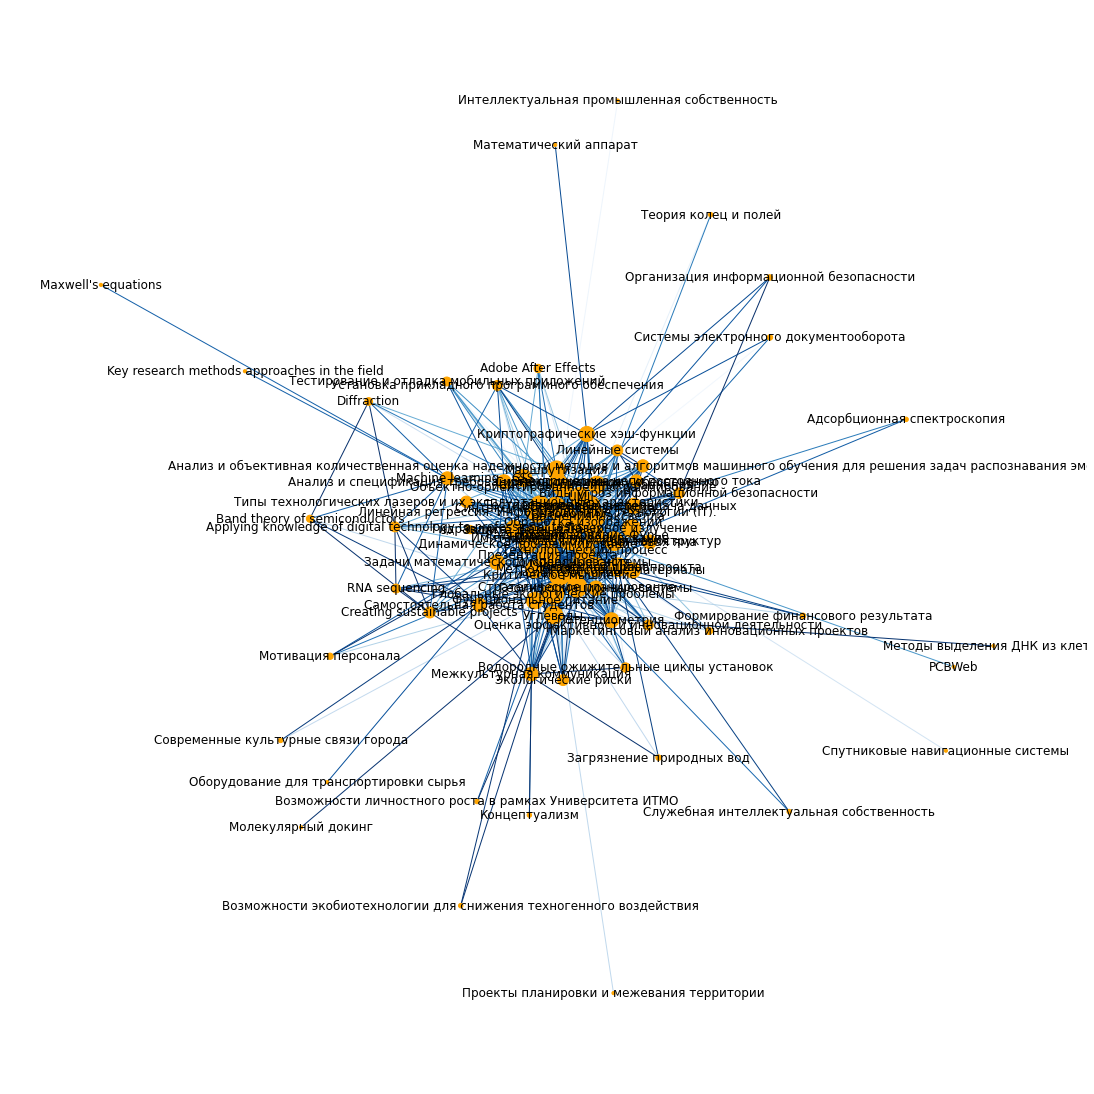

In [279]:
import matplotlib.pyplot as plt

C = nx.Graph()
C.add_weighted_edges_from(cluster_closeness)

# print(C.degree())

node_sizes = [deg*10 for node, deg in C.degree()]
plt.figure(figsize=(15,15))
pos = nx.layout.spring_layout(C, k=0.2)
edges, weights = zip(*nx.get_edge_attributes(C,'weight').items())
nx.draw(C, pos, node_color='orange', node_size=node_sizes, edgelist=C.edges(), edge_color=range(len(C.edges())), width=1.0, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

In [280]:
print(nx.info(C))
density = nx.density(C)
print("Network density:", density)
if nx.is_connected(G):
    print("Connectivity: True")
    print("Network diameter: ", nx.diameter(C))
else:
    print("Connectivity: False")


degree_dict = dict(C.degree(C.nodes()))
nx.set_node_attributes(C, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 15 nodes by degree:")
display(sorted_degree[:15])


eigenvector_dict = nx.eigenvector_centrality(C)
nx.set_node_attributes(C, eigenvector_dict, 'eigenvector')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Top 15 nodes by eigenvector centrality:")
display(sorted_eigenvector[:15])


betweenness_dict = nx.betweenness_centrality(C, normalized=True)
nx.set_node_attributes(C, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 15 nodes by betweenness centrality:")
display(sorted_betweenness[:15])


closeness_dict = nx.closeness_centrality(C)
nx.set_node_attributes(C, closeness_dict, 'betweenness')
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 15 nodes by betweenness centrality:")
display(sorted_closeness[:15])

Graph with 85 nodes and 855 edges
Network density: 0.23949579831932774
Connectivity: False
Top 15 nodes by degree:


[('Имитационное моделирование', 51),
 ('Базы данных', 50),
 ('Онтологии', 48),
 ('Презентация проекта', 47),
 ('Обработка изображений', 45),
 ('Критическое мышление', 45),
 ('Глобальные экологические проблемы', 44),
 ('Синтаксический анализ текста', 43),
 ('Дисперсные системы', 41),
 ('Линейная регрессия. Информационные технологии (IT).', 41),
 ('Уравнения Максвелла', 41),
 ('Встроенные системы', 40),
 ('Спектроскопия', 40),
 ('Стратегическое планирование', 39),
 ('Технологический процесс', 38)]

Top 15 nodes by eigenvector centrality:


[('Имитационное моделирование', 0.2012394456108887),
 ('Базы данных', 0.19349911576101533),
 ('Онтологии', 0.19155203151248382),
 ('Презентация проекта', 0.18920014099000856),
 ('Обработка изображений', 0.18531745105747968),
 ('Критическое мышление', 0.1809825766938817),
 ('Встроенные системы', 0.17609400335162262),
 ('Синтаксический анализ текста', 0.17576734466788024),
 ('Линейная регрессия. Информационные технологии (IT).', 0.17295759084744816),
 ('Дисперсные системы', 0.1683190417914593),
 ('Анимация', 0.16724230848433833),
 ('Спектроскопия', 0.16695746059405983),
 ('Технологический процесс', 0.16655793462887394),
 ('UML', 0.16580085564889047),
 ('Глобальные экологические проблемы', 0.16486092183113146)]

Top 15 nodes by betweenness centrality:


[('Глобальные экологические проблемы', 0.08229782765493951),
 ('Углеводы', 0.06515979124165514),
 ('Базы данных', 0.05891633339098542),
 ('Критическое мышление', 0.05510303717628102),
 ('Machine learning', 0.054725887810423084),
 ('Уравнения Максвелла', 0.05146559671588605),
 ('Онтологии', 0.05133762744174514),
 ('Синтаксический анализ текста', 0.049682269507139984),
 ('Обработка изображений', 0.044346720616276286),
 ('Криптографические хэш-функции', 0.03373497224566643),
 ('Стратегическое планирование', 0.033261893116625744),
 ('Имитационное моделирование', 0.033065355360246865),
 ('Жизненный цикл проекта', 0.031007646821494463),
 ('Динамическое программирование', 0.030120371669211814),
 ('Презентация проекта', 0.028050722086033052)]

Top 15 nodes by betweenness centrality:


[('Базы данных', 0.711864406779661),
 ('Имитационное моделирование', 0.7),
 ('Онтологии', 0.7),
 ('Обработка изображений', 0.6774193548387096),
 ('Презентация проекта', 0.6774193548387096),
 ('Критическое мышление', 0.6666666666666666),
 ('Синтаксический анализ текста', 0.65625),
 ('Глобальные экологические проблемы', 0.65625),
 ('Линейная регрессия. Информационные технологии (IT).', 0.65625),
 ('Уравнения Максвелла', 0.6511627906976745),
 ('Стратегическое планирование', 0.6461538461538462),
 ('Дисперсные системы', 0.6461538461538462),
 ('Спектроскопия', 0.6363636363636364),
 ('Встроенные системы', 0.631578947368421),
 ('Технологический процесс', 0.631578947368421)]

AttributeError: 'Graph' object has no attribute 'weighted_edges'

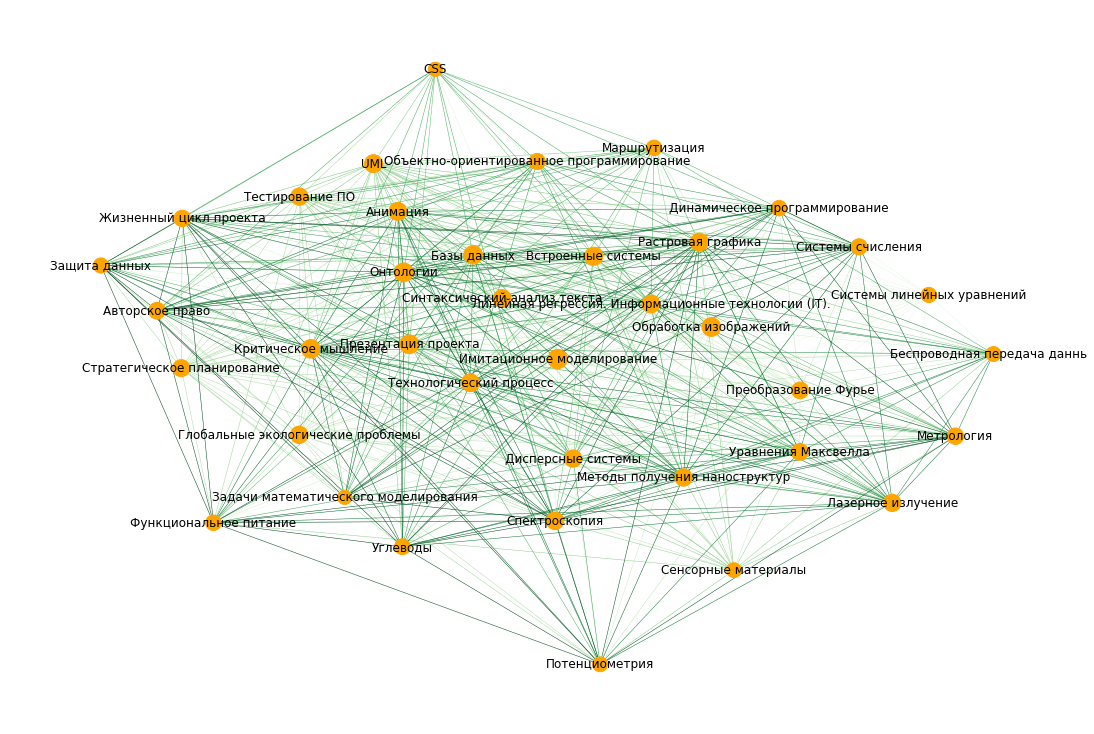

In [300]:
remove = [node for node, degree in C.degree() if degree < 20]
C.remove_nodes_from(remove)
remove_edge = [pair for pair in C.edges() if pair[0] in remove and pair[1] in remove]
C.remove_edges_from(remove_edge)
remove = [node for node, degree in dict(C.degree()).items() if degree < 1]
C.remove_nodes_from(remove)
node_sizes = [deg*10 for node, deg in C.degree()]
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(C)
edges, weights = zip(*nx.get_edge_attributes(C,'weight').items())
nx.draw(C, pos, node_color='orange', node_size=node_sizes, edgelist=C.edges(), edge_color=range(len(C.edges())), width=0.5, with_labels=True, edge_cmap=plt.cm.Greens)
plt.show()

In [301]:
len(C.nodes())

38